# **College Football Game Attendance Predictor**

With the 2022-2023 NCAA college football season beginning soon on December 16th, we will be using a linear regression machine learning model to analyze a dataset that encapsulates all college football game data from the year 2000 up until 2018. While this model can be used to predict many different variables, we will be using it to specifically predict game attendance.

## Import Libraries and Load Data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, LassoLars, LassoLarsCV, Ridge, RidgeCV
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
data = pd.read_csv("college_football.csv", encoding = 'latin-1')
data

,Date,Team,Time,Opponent,Rank,Site,TV,Result,Attendance,Current Wins,...,PRCP,SNOW,SNWD,TMAX,TMIN,Opponent_Rank,Conference,Year,Month,Day
0,9/2/2000,Arkansas,8:00 PM,Southwest Missouri State*,NR,"War Memorial StadiumLittle Rock, AR",Not on TV,W 380,53946,0,...,0.00,0.0,0.0,105,65,NR,SEC,2000,9,2
1,9/16/2000,Arkansas,6:00 PM,Boise State*,NR,"War Memorial StadiumLittle Rock, AR",Not on TV,W 3831,54286,1,...,0.00,0.0,0.0,79,44,NR,SEC,2000,9,16
2,9/23/2000,Arkansas,8:00 PM,Alabama,NR,"Razorback StadiumFayetteville, AR",ESPN2,W 2821,51482,2,...,2.12,0.0,0.0,85,63,NR,SEC,2000,9,23
3,9/30/2000,Arkansas,11:30 AM,No. 25 Georgia,NR,"Razorback StadiumFayetteville, AR",JPS,L 738,51162,3,...,0.00,0.0,0.0,77,45,25,SEC,2000,9,30
4,10/7/2000,Arkansas,6:00 PM,LouisianaMonroe*,NR,"Razorback StadiumFayetteville, AR",Not on TV,W 526,50947,3,...,0.00,0.0,0.0,50,28,NR,SEC,2000,10,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6667,9/22/2018,UTEP,5:30 PM,New Mexico State*,NR,"Sun BowlEl Paso, TX (Battle of I-10)",ESPN3,L 2027,19412,0,...,0.00,0.0,0.0,80,61,NR,CUSA,2018,9,22
6668,10/6/2018,UTEP,5:30 PM,North Texas,NR,"Sun BowlEl Paso, TX",beIN,L 2427,12809,0,...,0.00,0.0,0.0,88,67,NR,CUSA,2018,10,6
6669,10/27/2018,UTEP,5:30 PM,UAB,NR,"Sun BowlEl Paso, TX",ESPN+,L 019,10787,0,...,0.00,0.0,0.0,77,49,NR,CUSA,2018,10,27
6670,11/10/2018,UTEP,1:00 PM,Middle Tennessee,NR,"Sun BowlEl Paso, TX",ESPN+,L 3248,9690,1,...,0.00,0.0,0.0,63,44,NR,CUSA,2018,11,10


## Pre-Processing

### Dropping irrelevant features

In [ ]:
# create a list of features to drop from original dataset that are not relevant to this model
to_drop = ['Date', 'Team', 'Opponent', 'Site','Result', 'Fill Rate', 'Year', 'New Coach', 'Tailgating', 'Stadium Capacity']
# drop list of features
data.drop(to_drop, axis=1, inplace=True)
data

,Time,Rank,TV,Attendance,Current Wins,Current Losses,PRCP,SNOW,SNWD,TMAX,TMIN,Opponent_Rank,Conference,Month,Day
0,8:00 PM,NR,Not on TV,53946,0,0,0.00,0.0,0.0,105,65,NR,SEC,9,2
1,6:00 PM,NR,Not on TV,54286,1,0,0.00,0.0,0.0,79,44,NR,SEC,9,16
2,8:00 PM,NR,ESPN2,51482,2,0,2.12,0.0,0.0,85,63,NR,SEC,9,23
3,11:30 AM,NR,JPS,51162,3,0,0.00,0.0,0.0,77,45,25,SEC,9,30
4,6:00 PM,NR,Not on TV,50947,3,1,0.00,0.0,0.0,50,28,NR,SEC,10,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6667,5:30 PM,NR,ESPN3,19412,0,3,0.00,0.0,0.0,80,61,NR,CUSA,9,22
6668,5:30 PM,NR,beIN,12809,0,5,0.00,0.0,0.0,88,67,NR,CUSA,10,6
6669,5:30 PM,NR,ESPN+,10787,0,7,0.00,0.0,0.0,77,49,NR,CUSA,10,27
6670,1:00 PM,NR,ESPN+,9690,1,8,0.00,0.0,0.0,63,44,NR,CUSA,11,10


In [ ]:
# Check if there are any null values in our data that need to be dealt with
data.isna().sum()

Time              0
Rank              0
TV                0
Attendance        0
Current Wins      0
Current Losses    0
PRCP              0
SNOW              0
SNWD              0
TMAX              0
TMIN              0
Opponent_Rank     0
Conference        0
Month             0
Day               0
dtype: int64


### Encoding

In [ ]:
# Encode time to be a 0 if before 5pm and a 1 otherwise
data['Time'] = data['Time'].apply(lambda x: 1 if (int(x[0]) >= 5 and x[-2:] =='PM') else 0)
data['Time']

0       1
1       1
2       1
3       0
4       1
       ..
6667    1
6668    1
6669    1
6670    0
6671    0
Name: Time, Length: 6672, dtype: int64

In [ ]:
# Encode "Not ranked" to be a 26
data['Rank'] = data['Rank'].apply(lambda x: 26 if x == 'NR' else int(x))
data['Opponent_Rank'] = data['Rank'].apply(lambda x: 26 if x == 'NR' else int(x))
data['Opponent_Rank']

0       26
1       26
2       26
3       26
4       26
        ..
6667    26
6668    26
6669    26
6670    26
6671    26
Name: Opponent_Rank, Length: 6672, dtype: int64

In [ ]:
# Encode TV to be a 0 if not aired on tv and a 1 otherwise
data['TV'] = data['TV'].apply(lambda x: 0 if x == 'Not on TV' else 1)
data['TV']

0       0
1       0
2       1
3       1
4       0
       ..
6667    1
6668    1
6669    1
6670    1
6671    1
Name: TV, Length: 6672, dtype: int64

### One-Hot Encoding

One hot encoding steps using pandas seen below, found at this source:
https://stackoverflow.com/questions/37292872/how-can-i-one-hot-encode-in-python

In [ ]:
# Get unique values for Conference column and make them into their own columns
dummies = pd.get_dummies(data['Conference'])
# Add the new one-hot encoded data to the main dataframe
data= pd.concat([data, dummies], axis=1)
# drop original conference column as it has now been one hot encoded
data.drop('Conference', axis=1, inplace=True)
data

,Time,Rank,TV,Attendance,Current Wins,Current Losses,PRCP,SNOW,SNWD,TMAX,...,Big-12,CUSA,FCS,Independent,MWC,Mid-American,Pac-12,SEC,Sun Belt,WAC
0,1,26,0,53946,0,0,0.00,0.0,0.0,105,...,0,0,0,0,0,0,0,1,0,0
1,1,26,0,54286,1,0,0.00,0.0,0.0,79,...,0,0,0,0,0,0,0,1,0,0
2,1,26,1,51482,2,0,2.12,0.0,0.0,85,...,0,0,0,0,0,0,0,1,0,0
3,0,26,1,51162,3,0,0.00,0.0,0.0,77,...,0,0,0,0,0,0,0,1,0,0
4,1,26,0,50947,3,1,0.00,0.0,0.0,50,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6667,1,26,1,19412,0,3,0.00,0.0,0.0,80,...,0,1,0,0,0,0,0,0,0,0
6668,1,26,1,12809,0,5,0.00,0.0,0.0,88,...,0,1,0,0,0,0,0,0,0,0
6669,1,26,1,10787,0,7,0.00,0.0,0.0,77,...,0,1,0,0,0,0,0,0,0,0
6670,0,26,1,9690,1,8,0.00,0.0,0.0,63,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
# Check to make sure all dtaa types are now numbers and no more objects or strings remain
data.dtypes

Time                int64
Rank                int64
TV                  int64
Attendance          int64
Current Wins        int64
Current Losses      int64
PRCP              float64
SNOW              float64
SNWD              float64
TMAX                int64
TMIN                int64
Opponent_Rank       int64
Month               int64
Day                 int64
AAC                 uint8
ACC                 uint8
Big East            uint8
Big-10              uint8
Big-12              uint8
CUSA                uint8
FCS                 uint8
Independent         uint8
MWC                 uint8
Mid-American        uint8
Pac-12              uint8
SEC                 uint8
Sun Belt            uint8
WAC                 uint8
dtype: object

### Verify Correlation

The code to generate a correlation matrix was found at the source below:
https://aegis4048.github.io/mutiple_linear_regression_and_visualization_in_python

<ipython-input-11-6ed5050a1f91>:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


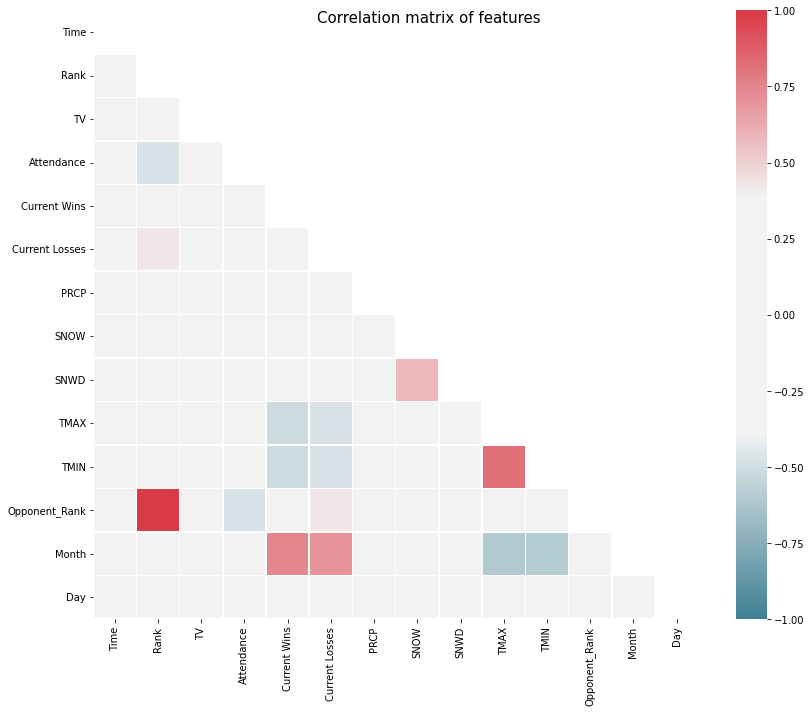

In [ ]:
# create list of one hot encoded features to drop from correlation matrix visualization
dropper = ['AAC', 'ACC', 'Big-10', 'Big East', 'Big-12',	'CUSA',	'FCS',	'Independent',	'MWC',	'Mid-American',	'Pac-12',	'SEC',	'Sun Belt',	'WAC']
temp = data.drop(dropper, axis=1)
corr = temp[:-1].corr(method='spearman')

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(12, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True, sep=100)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, linewidths=.5)

fig.suptitle('Correlation matrix of features', fontsize=15)

fig.tight_layout()

### Splitting Features and Labels

In [ ]:
# Assign the label to y
y = data['Attendance']
# Assign the rest of the feautures to X
X = data.drop('Attendance', axis=1)
y

0       53946
1       54286
2       51482
3       51162
4       50947
        ...  
6667    19412
6668    12809
6669    10787
6670     9690
6671    14962
Name: Attendance, Length: 6672, dtype: int64

In [ ]:
# display features
X

,Time,Rank,TV,Current Wins,Current Losses,PRCP,SNOW,SNWD,TMAX,TMIN,...,Big-12,CUSA,FCS,Independent,MWC,Mid-American,Pac-12,SEC,Sun Belt,WAC
0,1,26,0,0,0,0.00,0.0,0.0,105,65,...,0,0,0,0,0,0,0,1,0,0
1,1,26,0,1,0,0.00,0.0,0.0,79,44,...,0,0,0,0,0,0,0,1,0,0
2,1,26,1,2,0,2.12,0.0,0.0,85,63,...,0,0,0,0,0,0,0,1,0,0
3,0,26,1,3,0,0.00,0.0,0.0,77,45,...,0,0,0,0,0,0,0,1,0,0
4,1,26,0,3,1,0.00,0.0,0.0,50,28,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6667,1,26,1,0,3,0.00,0.0,0.0,80,61,...,0,1,0,0,0,0,0,0,0,0
6668,1,26,1,0,5,0.00,0.0,0.0,88,67,...,0,1,0,0,0,0,0,0,0,0
6669,1,26,1,0,7,0.00,0.0,0.0,77,49,...,0,1,0,0,0,0,0,0,0,0
6670,0,26,1,1,8,0.00,0.0,0.0,63,44,...,0,1,0,0,0,0,0,0,0,0


### Scaling Features

In [ ]:
# Scale X data for better results
scaler = MinMaxScaler()
X[X.columns] = scaler.fit_transform(X[X.columns])
X

,Time,Rank,TV,Current Wins,Current Losses,PRCP,SNOW,SNWD,TMAX,TMIN,...,Big-12,CUSA,FCS,Independent,MWC,Mid-American,Pac-12,SEC,Sun Belt,WAC
0,1.0,1.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.934783,0.631068,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,1.0,0.0,0.083333,0.000000,0.000000,0.0,0.0,0.652174,0.427184,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,1.0,1.0,0.166667,0.000000,0.328682,0.0,0.0,0.717391,0.611650,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,1.0,1.0,0.250000,0.000000,0.000000,0.0,0.0,0.630435,0.436893,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,1.0,0.0,0.250000,0.090909,0.000000,0.0,0.0,0.336957,0.271845,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6667,1.0,1.0,1.0,0.000000,0.272727,0.000000,0.0,0.0,0.663043,0.592233,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6668,1.0,1.0,1.0,0.000000,0.454545,0.000000,0.0,0.0,0.750000,0.650485,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6669,1.0,1.0,1.0,0.000000,0.636364,0.000000,0.0,0.0,0.630435,0.475728,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6670,0.0,1.0,1.0,0.083333,0.727273,0.000000,0.0,0.0,0.478261,0.427184,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Training and Testing

### Splitting Training and testing data

In [ ]:
# Split training and testing data with 95% test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.95, random_state=214)

### Initial Testing

In [ ]:
# Setup LinearRegression Model
model = LinearRegression()
model.fit(X_train, y_train)
# Get predicted output of test data
y_pred = model.predict(X_test)
# Score the testing data on the model
model.score(X_test, y_test)

0.7533622851393147

### Varying degree of LinearRegression Model

Note: this was adapted from Homework 1

In [ ]:
# 2nd Degree LinearRegression Model
model_sec = LinearRegression()
model_sec.fit(np.c_[X_train,X_train**2], y_train)
model_sec.score(np.c_[X_test, X_test**2], y_test)

0.7545596043743519

In [ ]:
# 3rd degree LinearRegression Model
model_third = LinearRegression()
model_third.fit(np.c_[X_train,X_train**2, X_train**3], y_train)
model_third.score(np.c_[X_test, X_test**2, X_test**3], y_test)

0.7566986547070051

### Training Verification

In [ ]:
# Initialize empty parameters
best_score = 0
best_size = 0

# Loop through different training sizes
for i in np.arange(0.01,0.95,0.01):
  # re-split the data based on the loop variable
  X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=i, random_state=214)
  # Re-run linear model
  model = LinearRegression()
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  score = model.score(X_test, y_test)

  # check if score has increased from previous iteration
  if score > best_score:
    best_score = score
    best_size = i

# print best alternative score and size
print('Best score: ' + str(best_score))
print('Best size: ' + str(best_size))

Best score: 0.7324991312463218
Best size: 0.9400000000000001


## Predictive Models

### Lasso

In [ ]:
# Setup Lasso Model
lasso = Lasso(alpha = 0.1, random_state = 214)
lasso.fit(X_train, y_train)
# Get predicted output of test data
lassopred = lasso.predict(X_test)
# Score the testing data on the model
lasso.score(X_test, y_test)

0.7324682953955152

### LassoCV

In [ ]:
reg = LassoCV(cv=5, random_state=214)
reg.fit(X_train, y_train)
score = reg.score(X_test, y_test)
# Report the optimal value
print("Lasso Parameters: " + str(reg.get_params()))

# Report the accuracy on test data for the best estimator
print("Best Lasso paramater accuracy: " + str(score))

Lasso Parameters: {'alphas': None, 'copy_X': True, 'cv': 5, 'eps': 0.001, 'fit_intercept': True, 'max_iter': 1000, 'n_alphas': 100, 'n_jobs': None, 'normalize': 'deprecated', 'positive': False, 'precompute': 'auto', 'random_state': 214, 'selection': 'cyclic', 'tol': 0.0001, 'verbose': False}
Best Lasso paramater accuracy: 0.73293484323267


### LassoLars

In [ ]:
# Setup LassoLars Model
lasso_lars = LassoLars(alpha = 0.1, random_state = 214, normalize=False)
lasso_lars.fit(X_train, y_train)
# Get predicted output of test data
lassoLarsPred = lasso.predict(X_test)
# Score the testing data on the model
lasso_lars.score(X_test, y_test)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_least_angle.py:682: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 27 iterations, alpha=7.457e+01, previous alpha=7.457e+01, with an active set of 18 regressors.
  warnings.warn(


0.721703047762702

### LassoLarsCV

In [ ]:
# Setup LassoLars Model
reg = LassoLarsCV(cv=5, normalize=False, n_jobs=-1)
reg.fit(X_train, y_train)
score = reg.score(X_test, y_test)
# Report the optimal value
print("Lasso Lars Parameters: " + str(reg.get_params()))

# Report the accuracy on test data for the best estimator
print("Best Lasso Lars paramater accuracy: " + str(score))

Lasso Lars Parameters: {'copy_X': True, 'cv': 5, 'eps': 2.220446049250313e-16, 'fit_intercept': True, 'max_iter': 500, 'max_n_alphas': 1000, 'n_jobs': -1, 'normalize': False, 'positive': False, 'precompute': 'auto', 'verbose': False}
Best Lasso Lars paramater accuracy: 0.721703047762702


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_least_angle.py:682: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 27 iterations, alpha=7.457e+01, previous alpha=7.457e+01, with an active set of 18 regressors.
  warnings.warn(


### Ridge

In [ ]:
# Setup Ridge Model
ridge = Ridge(alpha = 0.1, random_state = 214)
ridge.fit(X_train, y_train)
# Get predicted output of test data
ridgePred = lasso.predict(X_test)
# Score the testing data on the model
ridge.score(X_test, y_test)

0.732501411437551

### RidgeCV

In [ ]:
# Setup RidgeCV Model
reg = RidgeCV(cv=5)
reg.fit(X_train, y_train)
score = reg.score(X_test, y_test)

# Report the optimal value
print("Ridge Parameters: " + str(reg.get_params()))

# Report the accuracy on test data for the best estimator
print("Best Ridge paramater accuracy: " + str(score))

Ridge Parameters: {'alpha_per_target': False, 'alphas': array([ 0.1,  1. , 10. ]), 'cv': 5, 'fit_intercept': True, 'gcv_mode': None, 'normalize': 'deprecated', 'scoring': None, 'store_cv_values': False}
Best Ridge paramater accuracy: 0.7327346908315087


### RandomForestRegressor

In [ ]:
# Setup RFR Model
rfr = RandomForestRegressor(random_state = 214)
rfr.fit(X_train, y_train)
# Get predicted output of test data
rfrPred = lasso.predict(X_test)
# Score the testing data on the model
rfr.score(X_test, y_test)

0.7434459879644071

### RandomSearchCV for RandomForestRegressor

Code for hypertuning using randomsearchcv was adapted from the source seen below:
https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

In [ ]:
# Number of trees in random forest
n_estimators = np.arange(100,500,50)
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = np.arange(1,20,5)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 50, cv = 5, random_state=214, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

rf_random.best_params_

{'n_estimators': 250,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 16,
 'bootstrap': False}

### Optimized Hyperparameter RandomForestRegressor

In [ ]:
rfr = RandomForestRegressor(n_estimators = 250, min_samples_split =2, min_samples_leaf=2, max_features='sqrt', max_depth=16, bootstrap='False', random_state = 214)
rfr.fit(X_train, y_train)
rfrPred = lasso.predict(X_test)
rfr.score(X_test, y_test)

0.7636353244510506

## Results

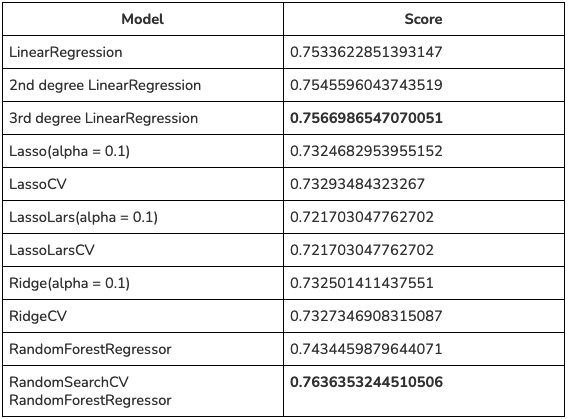

## Conclusion

With the college football season steadily approaching, it is found that the game attendance predictor explained in this report is an effective, efficient means of prediction. The data was pre-processed to remove unnecessary variables and trivial information. This allowed the model to only use relevant, location independent game data to accurately predict future college football game attendance at ~76%. This score is found to be consistent with industry standards and confirms this supervised multiple linear regression model is a great predictor for a variety of applications such as marketing, sales and management.